# Simple Regression Using TF

In [1]:
import tensorflow as tf
import numpy as np
tf.compat.v1.disable_eager_execution()
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_data = np.linspace(start=0.0,stop=2.0, num=1000000)# num = number of points

In [3]:
noise = np.random.rand(len(x_data))
noise

array([0.16678708, 0.76976158, 0.16135769, ..., 0.78301328, 0.05302408,
       0.81395205])

In [4]:
# y = mx+b, m=0.5 and b = 5
y_true = (0.5*x_data)+5+noise


In [5]:
x_df = pd.DataFrame(data=x_data, columns=['X_Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y_Label'])

In [6]:
my_data = pd.concat([x_df, y_df], axis=1)

In [7]:
my_data.head()

,X_Data,Y_Label
0,0.000000,5.166787
1,0.000002,5.769763
2,0.000004,5.161360
3,0.000006,5.238400
4,0.000008,5.596279


<AxesSubplot:xlabel='X_Data', ylabel='Y_Label'>

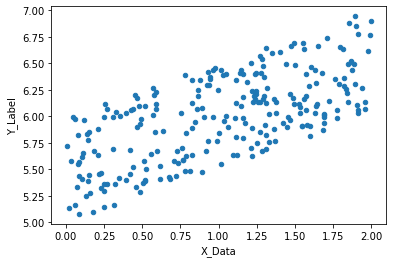

In [8]:
my_data.sample(n=250).plot(kind= 'scatter', x='X_Data', y="Y_Label")

In [9]:
batch_size = 8

In [10]:
m = tf.compat.v1.Variable(0.5)
b = tf.compat.v1.Variable(1.0)

In [11]:
xph = tf.compat.v1.placeholder(tf.float32,[batch_size])
yph = tf.compat.v1.placeholder(tf.float32,[batch_size])

In [12]:
# Model
y_model = m*xph +b

In [13]:
# COst Function
error = tf.reduce_sum(tf.square(yph-y_model))

In [14]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [15]:
# Initializer
init = tf.compat.v1.global_variables_initializer()

In [16]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    batches = 10000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
    model_m, model_b= sess.run([m,b])

In [17]:
model_m

0.4901378

In [18]:
model_b

5.5013556

In [19]:
y_hat = x_data*model_m +model_b

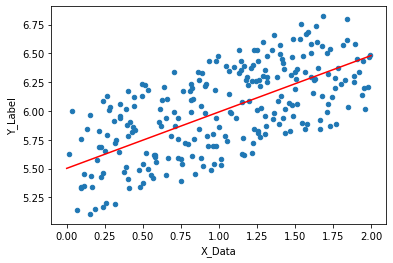

In [20]:
my_data.sample(n=250).plot(kind= 'scatter', x='X_Data', y="Y_Label")
plt.plot(x_data, y_hat, 'r')

In [21]:
# Estimators API
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [22]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Mahi\\AppData\\Local\\Temp\\tmp050ojgxr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [23]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size = 0.3, random_state=0)

In [25]:
x_train.shape

(700000,)

In [28]:
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x': x_train},y_train, batch_size=4, num_epochs=None, shuffle=True)

In [29]:
train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x': x_train},y_train, batch_size=4, num_epochs=1000, shuffle=False)

In [30]:
eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x': x_train},y_train, batch_size=4, num_epochs=1000, shuffle=False)

In [32]:
estimator.train(input_fn = input_func, steps= 1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead